In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from datetime import datetime

In [12]:
exec(open("../../header.py").read())

# Import data

In [3]:
X = pd.read_csv(processed_root('simulated_lee/simulated_X'))
y = pd.read_csv(processed_root('simulated_lee/simulated_y'))

In [4]:
X

,X1,X2
0,0.103129,-0.359429
1,1.498644,-0.158249
2,0.450521,0.732279
3,-0.896077,0.805959
4,1.980726,-0.735985
...,...,...
995,0.172554,0.747242
996,1.151053,0.862832
997,0.050584,-0.008455
998,1.871526,0.943660


# Fit model

In [5]:
# fit RF
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X, y)

<ipython-input-5-2b0a569fbba4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestRegressor(n_estimators=500)

# Use class

In [6]:
exec(open("../../header.py").read())

In [7]:
ice = ICE("continuous", trace = False)

In [13]:
ice.fit_single_feature(X, rf, "X1")
ice.fit_single_feature(X, rf, "X2")

Fit X1 in 1 seconds
Fit X2 in 2 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'X1 ICE Plot'}, xlabel='X1', ylabel='Target'>)

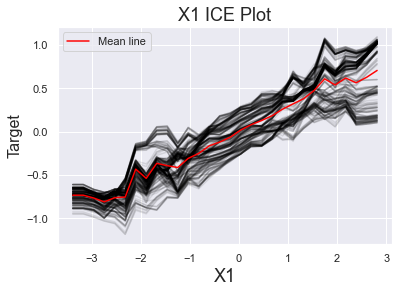

In [14]:
ice.ice_plot_single_feature('X1')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'X2 ICE Plot'}, xlabel='X2', ylabel='Target'>)

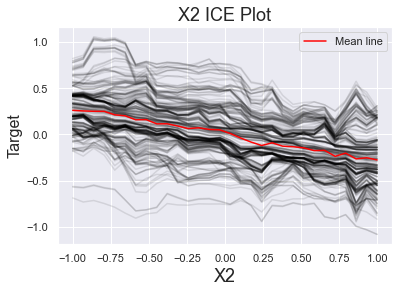

In [15]:
ice.ice_plot_single_feature('X2')

In [16]:
ice.fit(X, rf)

Fit X1 in 2 seconds
Fit X2 in 2 seconds


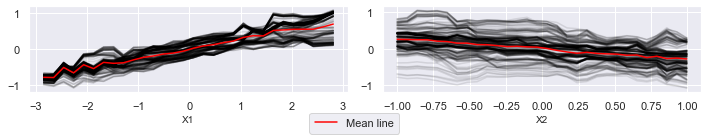

In [17]:
ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))

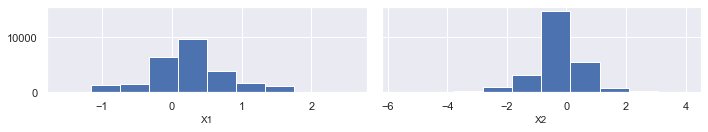

In [18]:
ice.feature_importance_hist(results_root("ice-plot-from-class/all_histograms.pdf"))

In [19]:
ice.feature_importance_table()

,Feature,Mean,Mean Abs,St. Dev.,Normalized Mean,Normalized Absolute Mean,Feature Importance
0,X1,0.263518,0.467672,0.569839,0.445525,0.790686,67.682533
1,X2,-0.269988,0.633761,0.896268,-0.160836,0.377541,32.317467
